In [ ]:
%cd /content/drive/MyDrive/데이터사이언스/Gan_Code_Paper/Pix2Pix
import os
import glob
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

import torch
import torch.nn as nn

from torch.utils.data import Dataset
from torch.utils.data import DataLoader
import torchvision.transforms as transforms
from torchvision.utils import save_image

/content/drive/MyDrive/데이터사이언스/Gan_Code_Paper/Pix2Pix


In [ ]:
%%capture
!wget http://efrosgans.eecs.berkeley.edu/pix2pix/datasets/facades.tar.gz -O facades.tar.gz
!tar -zxvf facades.tar.gz -C ./

In [ ]:
print("학습 데이터셋 A와 B의 개수:", len(next(os.walk('./facades/train/'))[2]))
print("평가 데이터셋 A와 B의 개수:", len(next(os.walk('./facades/val/'))[2]))
print("테스트 데이터셋 A와 B의 개수:", len(next(os.walk('./facades/test/'))[2]))

학습 데이터셋 A와 B의 개수: 400
평가 데이터셋 A와 B의 개수: 100
테스트 데이터셋 A와 B의 개수: 106


이미지 크기: (512, 256)


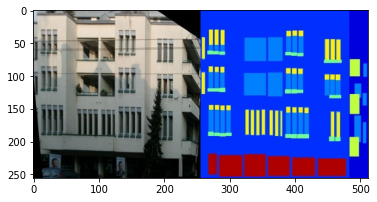

In [ ]:
# 한 쌍의 이미지 출력(왼쪽은 정답 이미지, 오른쪽은 조건 이미지)
image = Image.open('./facades/train/1.jpg')
print("이미지 크기:", image.size)

plt.imshow(image)
plt.show()

In [ ]:
class ImageDataset(Dataset):
  def __init__(self,root,transforms_=None,mode="train"):
    self.transform=transforms_
    self.files = sorted(glob.glob(os.path.join(root,"test")+"/*.jpg"))
    if mode=="train":
      self.files.extend(sorted(glob.glob(os.path.join(root,"test")+"/*.jpg")))
    
  def __getitem__(self,index):
    img=Image.open(self.files[index % len(self.files)])
    w,h = img.size
    img_A=img.crop((0,0,w/2,h))
    img_B=img.crop((w/2,0,w,h))

    if np.random.random()<0.5:
      img_A=Image.fromarray(np.array(img_A)[:,::-1,:],"RGB")
      img_B=Image.fromarray(np.array(img_B)[:,::-1,:],"RGB")
    
    img_A=self.transform(img_A)
    img_B=self.transform(img_B)

    return {"A":img_A,"B":img_B}

  def __len__(self):
    return len(self.files)

In [ ]:
transforms_=transforms.Compose([
                                transforms.Resize((256,256),Image.BICUBIC),
                                transforms.ToTensor(),
                                transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))
])

train_dataset=ImageDataset("facades",transforms_=transforms_)
val_dataset = ImageDataset("facades",transforms_=transforms_)

train_dataloader=DataLoader(train_dataset,batch_size=10,shuffle=True,num_workers=4)
val_dataloader=DataLoader(val_dataset,batch_size=10,shuffle=True,num_workers=4)

/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:281: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  "Argument interpolation should be of type InterpolationMode instead of int. "
/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
